In [1]:
from view import *
import datetime
from matplotlib.pyplot import *

In [4]:
EXAMPLE_JOURNAL = """
* write down reward modulated learning rule and include sketch figure                                                                                           * generate plot showing result of reward modulated learning for all layers                                                                                      * finish neurodynamics chapter 3 -> partially done, read just section 3.3                                                                                                                                                                                                                                                       done:                                                                                                                                                           * testing markdown desktop editor vnote                                                                                                                         * read neurodynamics section 3.3                                                                                                                                * improve Cell class to get cell id using cell_session_id and folder name (fname)s                                                                              * trying to understand why the position tracking from mat doesn't match the whl file. And the starting value for the plot isn't matching the one intended                                                                                                                                                                       ^Tprocrastination=0:30                                                                                                                                          ^Treading=5:20                                                                                                                                                  ^Tufrn=3:05                                                                                                                                                     ^Tpersonal=0:10                                                                                                                                                 ^Tmaiseducacao=0:15                                                                                                                                                                                                                                                                                                             
^A10:25^L11:45
^A14:50^E17:30
^S18:45^L22:15
^S23:50^E2:50
^S3:20^E4:00"""

EXAMPLE_JOURNAL_2 = """
* write down reward modulated learning rule and include sketch figure                                                                                           * generate plot showing result of reward modulated learning for all layers                                                                                      * finish neurodynamics chapter 3 -> partially done, read just section 3.3                                                                                                                                                                                                                                                       done:                                                                                                                                                           * testing markdown desktop editor vnote                                                                                                                         * read neurodynamics section 3.3                                                                                                                                * improve Cell class to get cell id using cell_session_id and folder name (fname)s                                                                              * trying to understand why the position tracking from mat doesn't match the whl file. And the starting value for the plot isn't matching the one intended                                                                                                                                                                       ^Tprocrastination=0:30                                                                                                                                          ^Treading=5:20                                                                                                                                                  ^Tufrn=3:05                                                                                                                                                     ^Tpersonal=0:10                                                                                                                                                 ^Tmaiseducacao=0:15                                                                                                                                                                                                                                                                                                             
^A10:25^L11:45
^A14:50^E17:30
^S18:45^L22:15
^S23:50^E2:50
^S3:20^E4:00"""

EMPTY_JOURNAL = ""

example_journals = [EXAMPLE_JOURNAL, EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2, 
            EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2, EXAMPLE_JOURNAL_2]
# example_journals

In [20]:
def check_worktimes(text):  
#     arrivals = re.findall('\^A(\d?\d:\d\d)', text)
#     leavings = re.findall('\^L(\d?\d:\d\d)', text)
#     starts = re.findall('\^S(\d?\d:\d\d)', text)
#     ends = re.findall('\^E(\d?\d:\d\d)', text)
#     return arrivals, leavings, starts, ends 
    starts = re.findall('\^[SA](\d?\d:\d\d)', text)
    ends = re.findall('\^[EL](\d?\d:\d\d)', text)
    return starts, ends 


def create_workblocks_from_worktimes(starts, ends):
    """
    starts: list of start times
    ends: list of end times
    return: work_blocks: list of (start_times, duration)
    """
    work_blocks = []
    if len(starts)!= len(ends):
        raise Exception("Error. Number of starts does not match number of ends. Check the journal format. Maybe some ^E or ^S tag is missing")
    for idx in range(len(starts)):  # create work blocks from work_times
        start = str_to_timedelta(starts[idx])
        end = str_to_timedelta(ends[idx])
        duration = end-start
        start_hr =  start.seconds/3600
        duration_hr =  duration.seconds/3600
        work_blocks.append((start_hr, duration_hr))
    return work_blocks
    
starts, ends = check_worktimes(EXAMPLE_JOURNAL)
print("starts", starts, '\n', "ends", ends)
entries = create_workblocks_from_worktimes(starts,ends)
entries

starts ['10:25', '12:50', '18:45'] 
 ends ['11:45', '17:30', '22:15']


[(10.416666666666666, 1.3333333333333333),
 (12.833333333333334, 4.666666666666667),
 (18.75, 3.5)]

10.416666666666666 1.3333333333333333
14.833333333333334 2.6666666666666665
18.75 3.5
23.833333333333332 3.0
3.3333333333333335 0.6666666666666666


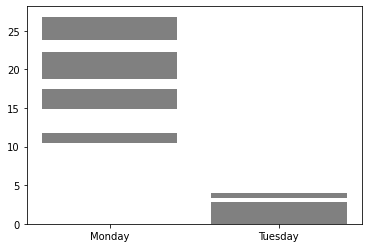

In [6]:
day = 1
for entry in entries:
    start, dur = entry
    print(start, dur)
#     if start >= 24: 
#         day = 2
    bar(day, dur, bottom=start, color='gray')
    if start <24 and start+dur>24:
        bar(day, 24-start, bottom=start, color='gray')
        day +=1
        bar(day, start+dur-24, bottom=0, color='gray')
        
plt.xticks([1,2],['Monday','Tuesday']);

# Week

In [34]:
today = datetime.date.today()
# today = datetime.date(2021,3,8)  
wk_range = get_week_range(today)
wk_range

[datetime.date(2021, 9, 27),
 datetime.date(2021, 9, 28),
 datetime.date(2021, 9, 29),
 datetime.date(2021, 9, 30),
 datetime.date(2021, 10, 1),
 datetime.date(2021, 10, 2),
 datetime.date(2021, 10, 3)]

In [35]:
def get_journal_for_strdate(strdate):
    """Extract total work time from given date
    param strdate: data in string format YYYY-MM-DD
    return (str) work_time (format HH:MM)
    """
    try:
        with open(join(JOURNALS_FOLDER, strdate+TXT_FORMAT), 'r', encoding=UTF8_ENCODING) as f:
            text = f.read().strip()
    except FileNotFoundError as e:
        text = ""
    return text

wk_journals = [get_journal_for_strdate(dt.strftime(DATE_FORMAT_YMD)) for dt in wk_range]
# wk_journals

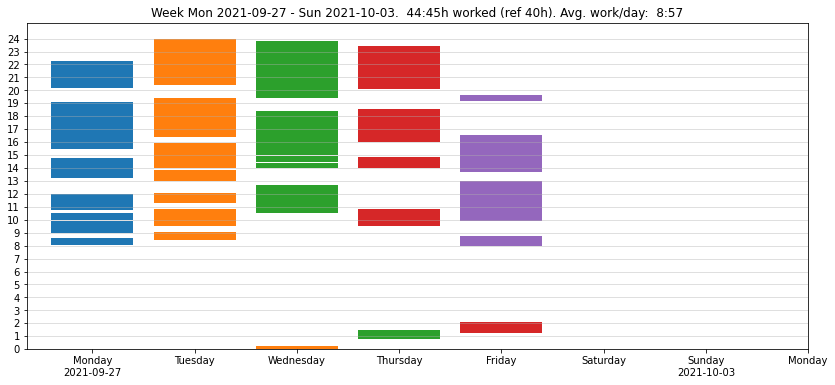

In [36]:
def plot_week_worktimes(journals, wk_range):    
    # one color per day of the week
    COLORS=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink"]

    plt.figure(figsize=(14,6))
    for day, journal in enumerate(journals):
#         print("-----", wk_range[day].strftime(DATE_FORMAT_YMD))
        starts, ends = check_worktimes(journals[day])

        work_blocks = create_workblocks_from_worktimes(starts,ends)

        color_idx = day
        previous_end = 0
        for work_block in work_blocks: # plot workblocks for a day
            start, dur = work_block
#             print(start, dur)
            if start <24 and start+dur>24:
                bar(day, 24-start, bottom=start, color=COLORS[color_idx])
                day +=1
                bar(day, start+dur-24, bottom=0, color=COLORS[color_idx])    
            elif previous_end > start:
                day +=1
                bar(day, dur, bottom=start, color=COLORS[color_idx])    
            else:
                bar(day, dur, bottom=start, color=COLORS[color_idx])

            if start+dur<24:  # set previous_end
                previous_end = start+dur
            else:
                previous_end = start+dur - 24
                
    wrk_hrs, ref_hrs, avg_per_day = calc_worked_time_in_date_range(wk_range)

    str_monday = wk_range[0].strftime(DATE_FORMAT_YMD)
    str_sunday = wk_range[-1].strftime(DATE_FORMAT_YMD)
    plt.title("Week Mon %s - Sun %s. %6sh worked (ref %dh). Avg. work/day: %5s" % (str_monday, str_sunday, 
                                                                                   wrk_hrs, avg_per_day, ref_hrs))
    plt.xticks(range(8),['Monday\n%s' % str_monday,'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday\n%s' % str_sunday, 'Monday']);
    plt.yticks(range(25))
    plt.grid(True, axis='y', alpha=0.5)

# wk_journals = example_journals
plot_week_worktimes(wk_journals, wk_range)

## See multiple weeks

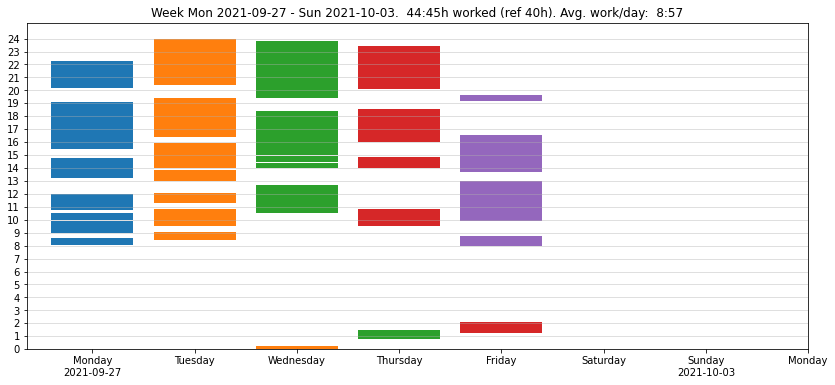

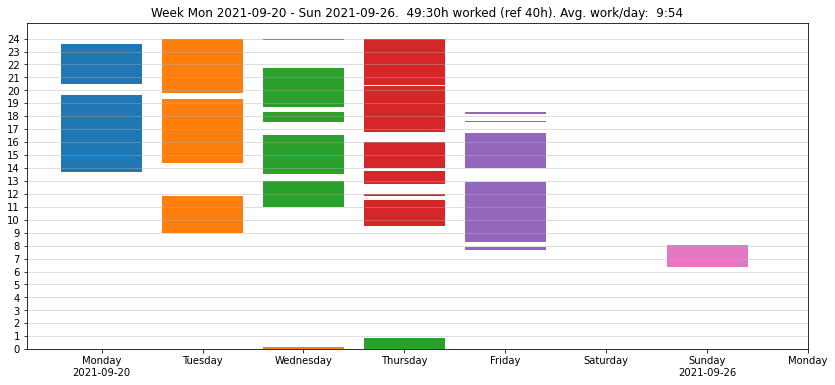

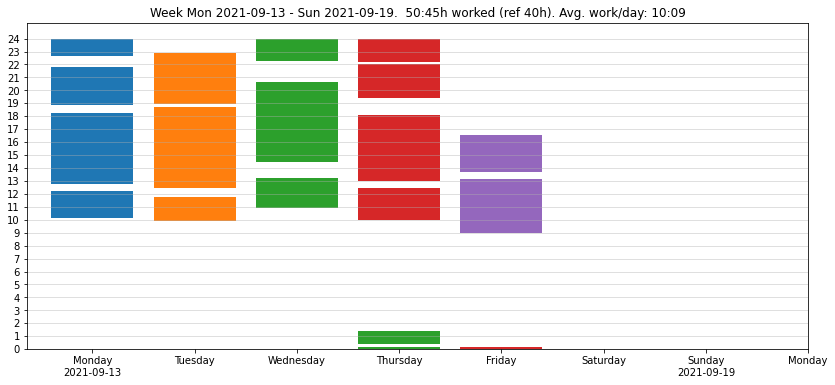

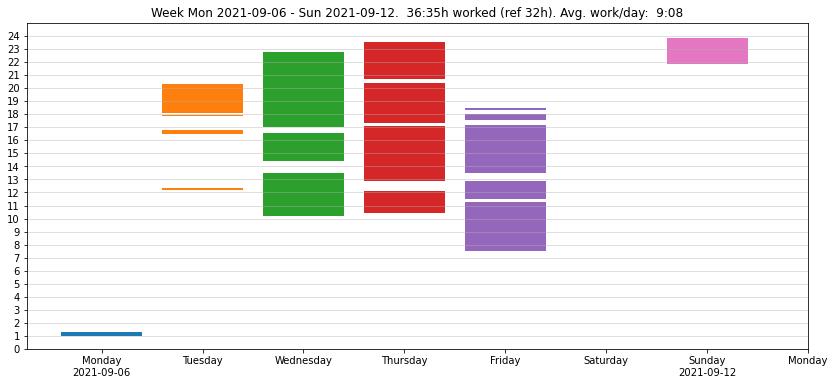

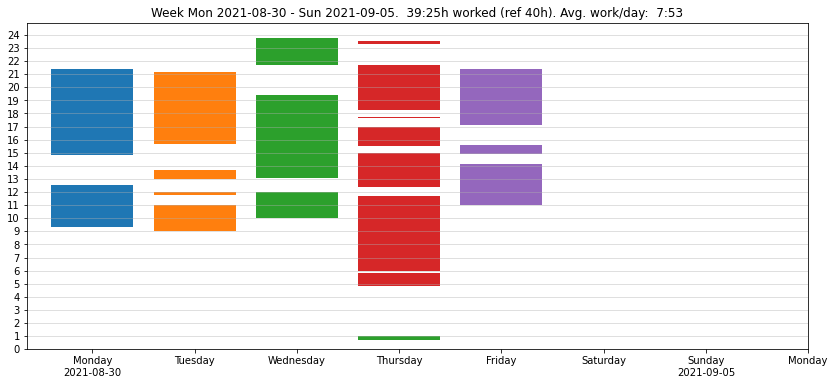

In [37]:
n_weeks=5
target = datetime.date.today()
for w in range(n_weeks):
    wk_target = target + timedelta(days=-7*w)
    wk_range = get_week_range(wk_target)
    wk_journals = [get_journal_for_strdate(dt.strftime(DATE_FORMAT_YMD)) for dt in wk_range]
    plot_week_worktimes(wk_journals, wk_range)

### Change timedelta class
This could potentially be used to obviate the use of the str_to_timedelta and timedelta_to_str

In [13]:
class h_td (timedelta):
    def __new__(self, *args, **kwargs):
        str_time=kwargs.pop('str_time', None)
        obj =  super().__new__(self, *args, **kwargs)
#         if str_time is not None:
#             obj.seconds = int(str_time.split(":")[0]) * 3600 + int(str_time.split(":")[1]) * 60
        return obj
    def __init__(self, *args, **kwargs):
        str_time=kwargs.pop('str_time', None)
# #             super().__init__(seconds=int(kwargs['str_time'].split(":")[0]) * 3600 + int(kwargs['str_time'].split(":")[1]) * 60)
# #         else:
        super().__init__()
        if str_time is not None:
            self.seconds=int(str_time.split(":")[0]) * 3600 + int(str_time.split(":")[1]) * 60
    def __str__(self):
        return "%d:%02d" % (self.days*24 + self.seconds//3600, ((self.seconds // 60) % 60))
print(h_td(seconds=1320))

0:22


In [14]:
print(h_td(seconds=1320) + h_td(hours=1) + h_td(minutes=20))

1:42:00


In [95]:
timedelta_to_str(timedelta(hours=12, minutes=10))

'12:10'

In [59]:
timedelta_to_str(h_td(seconds=12*3600+10*60))

'12:10'

In [91]:
h_td(str_time="12:10")

AttributeError: readonly attribute